In [ ]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 2.9 MB/s eta 0:00:00


In [ ]:
import osmnx as ox
import folium

place = "Huangpu, Shanghai, China"
gdf = ox.geocoder.geocode_to_gdf(place)

In [ ]:
gdf

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((121.45221 31.22577, 121.45224 31.225...",121.452211,31.190191,121.505959,31.246306,208158205,relation,371650,31.233593,121.479864,boundary,administrative,12,0.52073,city,Huangpu District,"Huangpu District, Shanghai, China"


In [ ]:
!pip install folium matplotlib mapclassify
gdf.explore()

In [ ]:
huangpu_polygon = gdf.union_all()

In [ ]:
centroid = huangpu_polygon.centroid
m = folium.Map(location=[centroid.y, centroid.x], zoom_start=10)
folium.GeoJson(huangpu_polygon).add_to(m)
m

In [ ]:
buildings_gdf = ox.features_from_polygon(
    huangpu_polygon,
    tags = {
        "building": True,
        "highway": True
    }
)

In [ ]:
streets_graph = ox.graph_from_polygon(huangpu_polygon, network_type="all")
streets_gdf = ox.graph_to_gdfs(streets_graph, nodes=True)

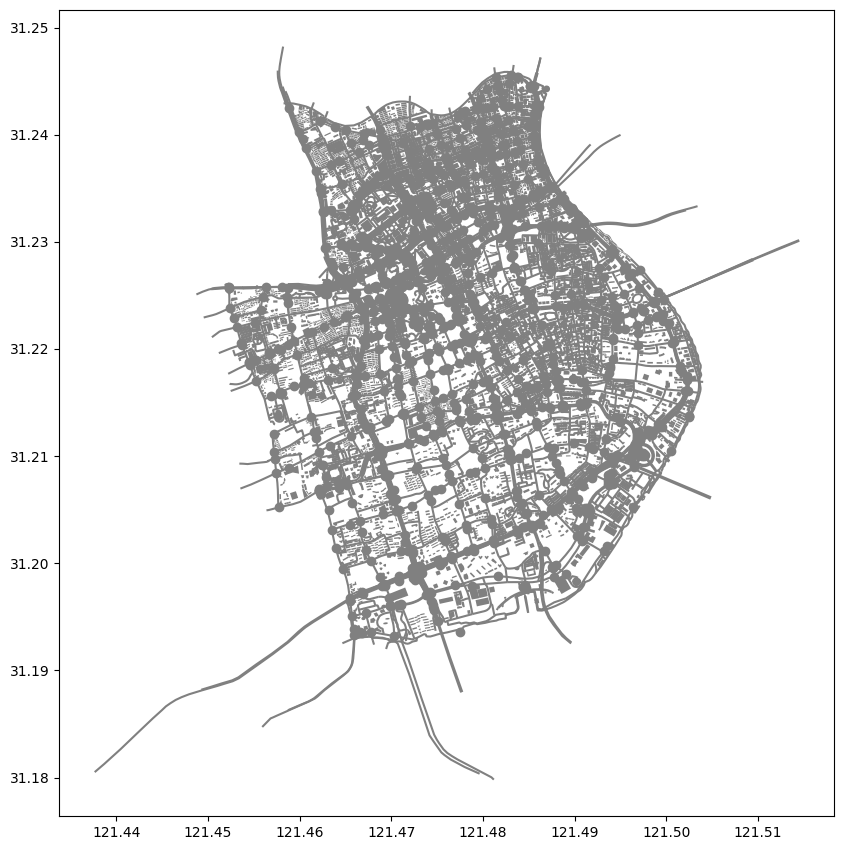

In [ ]:
ax = buildings_gdf.plot(figsize=(10, 15), color="gray")

In [ ]:
!pip install contextily
!pip install geodatasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 66.4 MB/s eta 0:00:00


In [ ]:
%matplotlib inline

import contextily as cx
import geopandas
import rasterio
from rasterio.plot import show as rioshow
import matplotlib.pyplot as plt
from geodatasets import get_path

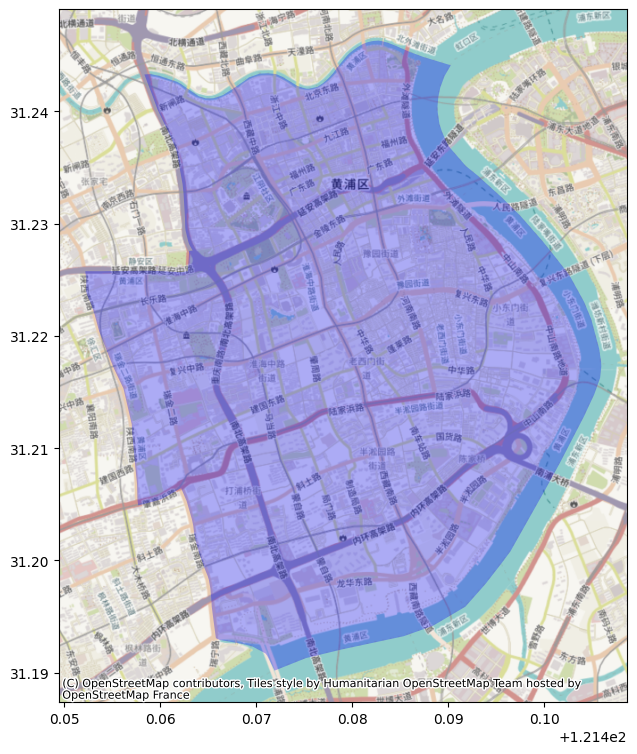

In [ ]:
ax = gdf.plot(color="blue", figsize=(9, 9), alpha=0.3)
cx.add_basemap(ax, crs=gdf.crs)

In [ ]:
poly = gdf.iloc[0, 0]

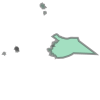

In [ ]:
poly

<Axes: >

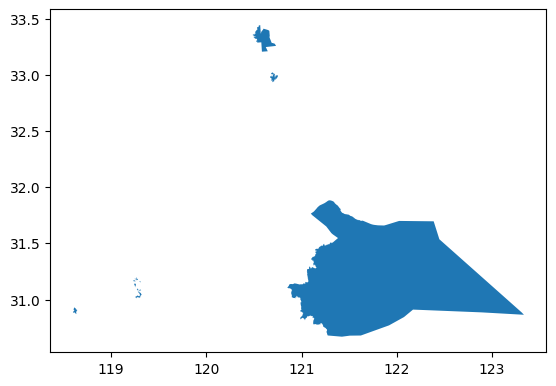

In [ ]:
gdf.plot()

In [ ]:
ox.geocode_to_gdf?

In [ ]:
tags_dict = {'tourism': 'museum'}
museum = ox.features_from_polygon(poly, tags=tags_dict)

/usr/local/lib/python3.11/dist-packages/osmnx/_overpass.py:267: UserWarning: This area is 28 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


<Axes: >

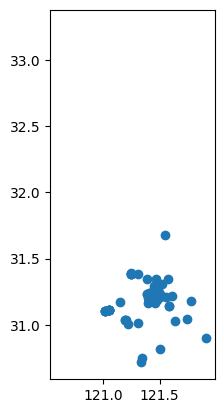

In [ ]:
museum.plot()

In [ ]:
museum.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 178 entries, ('node', np.int64(554246824)) to ('way', np.int64(1376876640))
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   geometry                178 non-null    geometry
 1   name                    156 non-null    object  
 2   name:en                 95 non-null     object  
 3   tourism                 178 non-null    object  
 4   name:zh-Hans            20 non-null     object  
 5   designation             1 non-null      object  
 6   source                  3 non-null      object  
 7   addr:housenumber        41 non-null     object  
 8   fee                     7 non-null      object  
 9   name:ja                 2 non-null      object  
 10  opening_hours           27 non-null     object  
 11  addr:city               14 non-null     object  
 12  addr:district           12 non-null     object  
 13  addr:province     